In [1]:
#import statements

#standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#standard sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#sklearn algorithms
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
#load data
dfTrain = pd.read_csv('FinalTrain.csv',index_col =0) 
dfTest = pd.read_csv('FinalTest.csv',index_col =0) 

In [3]:
print(dfTrain.shape)
print(dfTest.shape)
#dfTest does not have SalePriceLog because couldn't convert it
#need to remove SalePriceLog from training data before training

(1460, 80)
(1459, 79)


In [4]:
#list to filter the data set

goalNfilter = ['SalePrice']
goalLfilter = ['SalePriceLog']

objectFilter = ['BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtQual', 'CentralAir', 'Condition1', 'Condition2', 'DataType',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'Functional', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape',
       'MSZoning', 'MasVnrType', 'Neighborhood', 'PavedDrive', 'RoofMatl',
       'RoofStyle', 'SaleCondition', 'SaleType']

intFilter = ['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'Id', 'KitchenAbvGr', 'LotArea',
       'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold']

OrgFeatures = [objectFilter + intFilter]

FeatEnginer = list(dfTrain.columns[-10:])

intFilterAll = intFilter + FeatEnginer

In [7]:
#Filter to look at that might perform better
topBot5 = ['OverallQual','TotSF','GrLivArea','GarageCars','GarageArea',
           'MSSubClass','EnclosedPorch','KitchenAbvGr','YrSinceRemod','HouseAge']

topBot10 = ['BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold',
            'OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr','YrSinceRemod','HouseAge',
'OverallQual','TotSF','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','TotFullBath','FullBath','TotRmsAbvGrd']

In [12]:
topBot5Hood = ['OverallQual','TotSF','GrLivArea','GarageCars','GarageArea',
           'MSSubClass','EnclosedPorch','KitchenAbvGr','YrSinceRemod','HouseAge','NewNeighborhood']

In [13]:
#create target variable(s)
yNormal = dfTrain.SalePrice
yLog = dfTrain.SalePriceLog

In [16]:
#create data set for normal testing + log testing

#looking only at topBot5 to start because easiest
dfTrainN = (dfTrain[topBot5Hood]).copy()
dfTrainL = (dfTrain[topBot5Hood]).copy()

In [17]:
dfTrainN.head()

,OverallQual,TotSF,GrLivArea,GarageCars,GarageArea,MSSubClass,EnclosedPorch,KitchenAbvGr,YrSinceRemod,HouseAge,NewNeighborhood
0,7,1710,1710,2.0,548.0,60,0,1,8,8,109.616454
1,6,1262,1262,2.0,460.0,20,0,1,35,35,121.178432
2,7,1786,1786,2.0,608.0,60,0,1,9,10,109.616454
3,7,1717,1717,3.0,642.0,70,272,1,41,96,111.519733
4,8,2198,2198,3.0,836.0,60,0,1,11,11,167.593107


In [18]:
#create target variables
yTargetN = dfTrain.SalePrice
yTargetL = dfTrain.SalePriceLog

In [19]:
#create test and training data

#Normal Set up
xTrainNorm, xTestNorm, yTrainNorm, yTestNorm = train_test_split(dfTrainN,yNormal,test_size = .3)

#Log Set Up
xTrainLog, xTestLog, yTrainLog, yTestLog = train_test_split(dfTrainL,yLog,test_size = .3)

In [20]:
print(xTrainNorm.shape)
print(yTrainNorm.shape)
print()
print(xTestNorm.shape)
print(yTestNorm.shape)

(1022, 11)
(1022,)

(438, 11)
(438,)


In [22]:
#Define Classifiers

#Normal Classifiers
clfNlin = linear_model.LinearRegression()
clfNtree = DecisionTreeRegressor()
clfNknn = KMeans(n_clusters=3)

#Log Classifiers
clfLlin = linear_model.LinearRegression()
clfLtree = DecisionTreeRegressor()
clfLknn = KMeans(n_clusters=3)

In [23]:
#Make Predictions

#Fit Normal Classifiers
clfNlin.fit(xTrainNorm,yTrainNorm)
clfNtree.fit(xTrainNorm,yTrainNorm)
clfNknn.fit(xTrainNorm,yTrainNorm)

#Fit Log Classifiers
clfLlin.fit(xTrainLog,yTrainLog)
clfLtree.fit(xTrainLog,yTrainLog)
clfLknn.fit(xTrainLog,yTrainLog)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
#Make predictions

#Normal Predictions
predNlin = clfNlin.predict(xTestNorm)
predNtree = clfNtree.predict(xTestNorm)
predNknn = clfNknn.predict(xTestNorm)

#Log Predictions
predLlin = clfLlin.predict(xTestLog)
predLtree = clfLtree.predict(xTestLog)
predLknn = clfLknn.predict(xTestLog)

In [25]:
#Predictions
ACCpredNlin = np.sqrt(mean_squared_error(predNlin,yTestNorm))
ACCpredNtree = np.sqrt(mean_squared_error(predNtree,yTestNorm))
ACCpredNknn = np.sqrt(mean_squared_error(predNknn,yTestNorm))

ACCpredLlin = np.sqrt(mean_squared_error(predLlin,yTestLog))
ACCLtree = np.sqrt(mean_squared_error(predLtree,yTestLog))
ACCLknn = np.sqrt(mean_squared_error(predLknn,yTestLog))

In [27]:
print(ACCpredNlin)
print(ACCpredNtree)
print(ACCpredNknn)

print()

print(ACCpredLlin)
print(ACCLtree)
print(ACCLknn)

35896.0561606
38436.2047336
201678.714274

0.168042122227
0.218135541062
11.3195084672


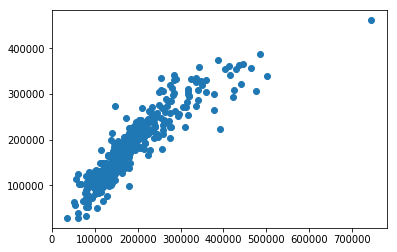

In [28]:
plt.scatter(yTestNorm,predNlin)

In [29]:
#Such high values for KNN suggests they aren't working at all.  Should be seeing normal decent looking housing prices 
print(predNknn)
print()
print(predLknn)

[2 1 2 1 2 0 0 0 0 0 2 2 0 0 0 2 0 1 0 0 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0 2 1
 1 1 0 1 2 0 0 0 0 0 1 0 0 2 0 2 1 2 0 0 0 2 0 2 2 2 0 0 0 1 2 0 2 2 0 2 0
 2 1 0 0 0 0 2 0 2 0 2 0 0 1 0 1 0 0 1 2 2 0 0 1 0 2 0 0 2 0 2 0 2 0 2 0 2
 0 0 0 0 2 0 2 2 2 0 2 2 2 0 0 2 0 0 2 0 0 0 2 2 0 2 0 2 0 2 0 0 2 2 0 1 2
 0 0 1 0 1 0 2 0 2 0 2 0 1 0 2 1 0 2 2 0 2 2 1 1 0 0 0 0 2 0 0 2 0 2 2 2 0
 2 2 0 0 0 0 0 2 1 1 0 0 0 0 2 0 2 0 1 0 0 0 0 2 0 2 2 2 2 0 1 0 2 2 2 0 1
 2 0 2 2 2 2 0 1 1 0 0 0 2 2 0 0 1 2 2 0 2 0 2 2 0 0 0 2 2 2 2 1 2 0 2 0 2
 0 2 0 2 1 0 2 2 0 2 0 0 2 0 0 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 2 0 1 2 0 0
 0 2 2 2 0 2 0 2 2 0 2 2 0 2 2 0 2 0 2 0 2 0 0 0 2 1 0 1 2 0 2 2 2 0 0 2 1
 0 0 2 2 1 0 2 0 0 0 2 0 0 0 0 0 2 1 2 0 2 0 0 2 0 2 0 0 2 2 1 2 2 0 0 0 0
 2 2 0 2 2 0 1 2 2 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2 1 2 2 0 2 2 2 2 2 0 2 0
 1 2 2 2 0 0 2 1 1 2 2 0 2 0 0 0 2 0 2 0 0 0 2 2 1 1 0 0 0 2 2]

[0 1 1 1 0 1 1 1 1 1 0 0 0 2 1 1 1 0 1 0 1 1 1 0 0 0 1 0 2 1 1 0 1 1 1 0 1
 0 1 0 1 0 1 1 2 2 0 1 0 1 1 0 1 1 

In [30]:
xTest = dfTest[topBot5Hood].copy()

In [31]:
xTest.head()

,OverallQual,TotSF,GrLivArea,GarageCars,GarageArea,MSSubClass,EnclosedPorch,KitchenAbvGr,YrSinceRemod,HouseAge,NewNeighborhood
0,5,896,896,1.0,730.0,20,0,1,50,50,77.821012
1,6,1329,1329,1.0,312.0,20,0,1,53,53,77.821012
2,5,1629,1629,2.0,482.0,60,0,1,13,14,100.611451
3,6,1604,1604,2.0,470.0,60,0,1,13,13,100.611451
4,8,1280,1280,2.0,506.0,120,0,1,19,19,154.530295


In [33]:
#submit to kaggle

NormLinSub = clfNlin.predict(xTest) 
NormTreeSub = clfNtree.predict(xTest)

LogLinSub = clfLlin.predict(xTest)
LogTreeSub = clfLtree.predict(xTest) 

In [34]:
#unlog numbers in python
LogLinSub = np.exp(LogLinSub)

LogTreeSub = np.exp(LogTreeSub)

In [35]:
#get list of test Ids for submission
testIds = dfTest.Id

In [36]:
#create dictionary with Ids and Sales Price
NormLinSub1 = {'Id':testIds,'SalePrice':NormLinSub}
NormTreeSub1 = {'Id':testIds,'SalePrice':NormTreeSub}
LogLinSub1 = {'Id':testIds,'SalePrice':LogLinSub}
LogTreeSub1 = {'Id':testIds,'SalePrice':LogTreeSub}

In [37]:
#turn into a dataframe
NormLinSub1 = pd.DataFrame(NormLinSub1)
NormTreeSub1 = pd.DataFrame(NormTreeSub1)
LogLinSub1 = pd.DataFrame(LogLinSub1)
LogTreeSub1 = pd.DataFrame(LogTreeSub1)

In [38]:
#NormLinSub1.to_csv("NormLinSub1.csv",index = False)
#NormTreeSub1.to_csv("NormTreeSub1.csv",index = False)
LogLinSub1.to_csv("LogLinSubHood.csv",index = False)
#LogTreeSub1.to_csv("LogTreeSub1.csv",index = False)

In [ ]:
#Adding in the housing neighboorhood stuff improved scores by .4%.  Which is good to know and understand